<a href="https://colab.research.google.com/github/lcaspari/42_tensorflow_homework/blob/main/homework07/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import dependencies

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

# load the data

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# process the data

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# 28x28 → 28x28x1
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [67]:
class Autoencoder(Model):
  def __init__(self, latentDim):
    super(Autoencoder, self).__init__()
    self.latentDim = latentDim  

    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)), 

      # some conv layers to get the featuremap of the image
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      # shape=(batch, 14,14,16)
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2),
      # shape=(batch, 7,7,8)

      # flatten the image
      layers.Flatten(),
      # shape=(row, column, 8)=392  

      # create latent vector of size n (number of units = n)
      layers.Dense(units=self.latentDim)
      # shape=(latentDim)
    ])

    self.decoder = tf.keras.Sequential([
      layers.Dense(units=392),
      layers.Reshape([7,7,8]),
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(64)


In [70]:
autoencoder.compile(optimizer='adam', loss="binary_crossentropy")

In [71]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
 114/1875 [>.............................] - ETA: 1:03 - loss: 0.5064

KeyboardInterrupt: ignored

In [ ]:
autoencoder.encoder.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
flatten_2 (Flatten)          (None, 392)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                25152     
Total params: 26,472
Trainable params: 26,472
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoded_imgs = autoencoder.encoder(x_test[:1000]).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()


Display the processed images

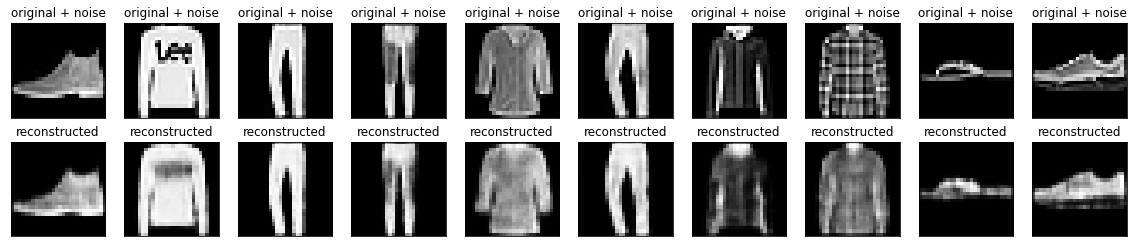

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()


In [ ]:
print(encoded_imgs.shape)

(1000, 64)


In [ ]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(encoded_imgs)

In [ ]:
print(X_embedded.shape)

(1000, 2)


In [ ]:
# get the classes of the first 1000 images
print(np.unique(y_train[:1000]))

[0 1 2 3 4 5 6 7 8 9]


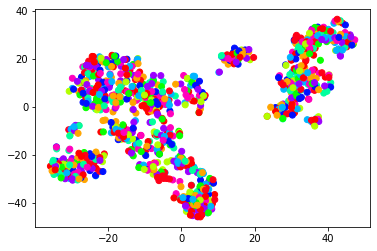

In [ ]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_train[:1000], cmap="hsv")

Autoencoder with latenDim = 10

In [ ]:
autoencoder2 = Autoencoder(10)

In [ ]:
autoencoder2.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder2.fit(x_train, x_train,
                 epochs=10, shuffle=True, 
                 validation_data=(x_test,x_test))

Epoch 1/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.3243 - val_loss: 0.2994
Epoch 2/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2948 - val_loss: 0.2951
Epoch 3/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2919 - val_loss: 0.2931
Epoch 4/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2904 - val_loss: 0.2921
Epoch 5/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2895 - val_loss: 0.2913
Epoch 6/10
1875/1875 [==============================] - 67s 35ms/step - loss: 0.2888 - val_loss: 0.2907
Epoch 7/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2883 - val_loss: 0.2903
Epoch 8/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2878 - val_loss: 0.2897
Epoch 9/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2875 - val_loss: 0.2895
Epoch 10/10
1875/1875 [==============================] - 66s 35m

In [ ]:
encoded_imgs2 = autoencoder2.encoder(x_test[:1000]).numpy()
decoded_imgs2 = autoencoder2.decoder(encoded_imgs2).numpy()

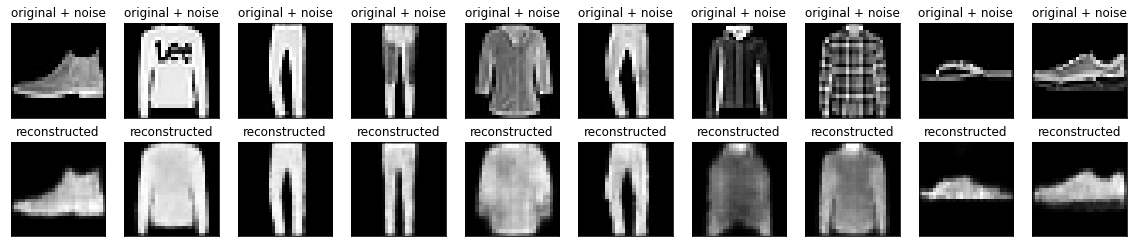

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs2[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()


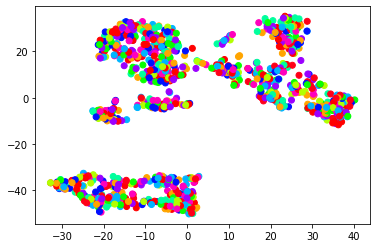

In [ ]:
from sklearn.manifold import TSNE

X_embedded2 = TSNE(n_components=2).fit_transform(encoded_imgs2)
plt.scatter(X_embedded2[:,0], X_embedded2[:,1], c=y_train[:1000], cmap="hsv")

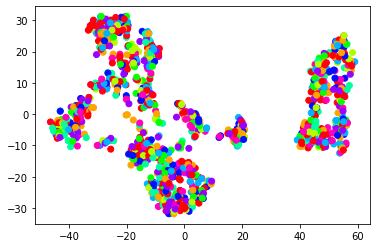

In [ ]:
X_embedded2_2 = TSNE(n_components=2).fit_transform(encoded_imgs2)
plt.scatter(X_embedded2_2[:,0], X_embedded2_2[:,1], c=y_train[:1000], cmap="hsv")